## Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## (I) Data Preprocessing

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
None


In [5]:
# Count null values
null_values = df.isnull().sum()
print("Number of null values:", null_values)

# Count duplicated rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicated rows:", duplicate_rows)

Number of null values: PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
Number of duplicated rows: 0


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [8]:
df.rename(columns={"Pclass":'Passenger_Class','Sex':'Gender','SibSp': 'Siblings_Aboard', 'Parch': 'Family_Aboard'}, inplace=True)

In [9]:
gender_mapping={'male':0,'female':1}
embarked_mapping={'S':0,'C':1,'Q':2}

df['Gender']=df['Gender'].map(gender_mapping)
df['Embarked']=df['Embarked'].map(embarked_mapping)

In [10]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
          Survived  Passenger_Class       Gender          Age  \
count  1309.000000      1309.000000  1309.000000  1309.000000   
mean      0.377387         2.294882     0.355997    29.503186   
std       0.484918         0.837836     0.478997    12.905241   
min       0.000000         1.000000     0.000000     0.170000   
25%       0.000000         2.000000     0.000000    22.000000   
50%       0.000000         3.000000     0.000000    28.000000   
75%       1.000000         3.000000     1.000000    35.000000   
max       1.000000         3.000000     1.000000    80.000000   

       Siblings_Aboard  Family_Aboard         Fare     Embarked  
count      1309.000000    1309.000000  1309.000000  1309.000000  
mean          0.498854       0.385027    33.281086     0.394194  
std           1.041658       0.865560    51.741500     0.653499  
min           0.000000       0.000000     0.000000     0.000000  
25%           0.000000       0.000000     7.895800     0.000

In [11]:
df

,Survived,Passenger_Class,Gender,Age,Siblings_Aboard,Family_Aboard,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
1304,0,3,0,28.0,0,0,8.0500,0
1305,1,1,1,39.0,0,0,108.9000,1
1306,0,3,0,38.5,0,0,7.2500,0
1307,0,3,0,28.0,0,0,8.0500,0


## (II) Data Exploration

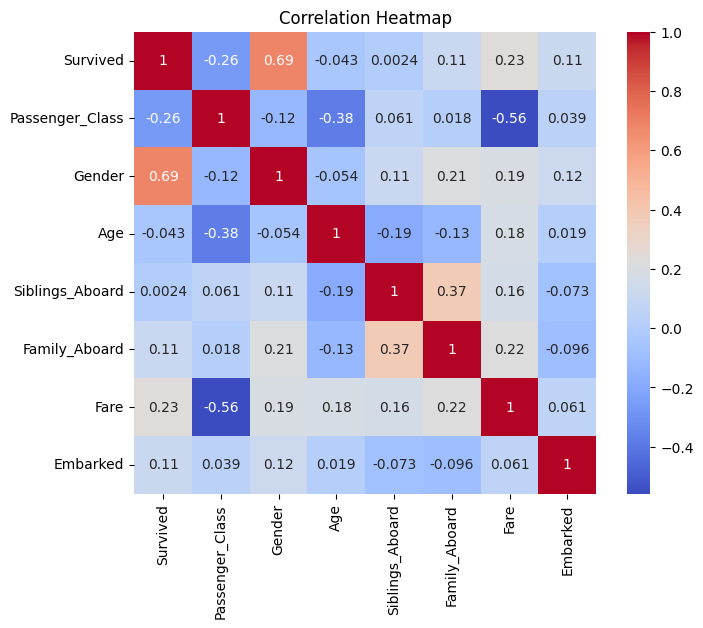

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

## Possible Explanations for Correlation Between Survival and Other Attributes

### Passenger Class (Moderate Negative Correlation)
- Passengers in higher classes (1st class, represented by the lowest numerical value) were more likely to survive compared to those in lower classes (2nd or 3rd class).  
- Likely due to better access to lifeboats and assistance during evacuation.

---

### Gender (Strong Positive Correlation)
- Females (encoded as 1) had a higher likelihood of survival compared to males (encoded as 0).  
- Aligns with the historical account of the Titanic's evacuation policy, where women and children were given priority for lifeboats.
---

### Age (Weak Negative Correlation)
- Younger passengers were marginally more likely to survive than older ones.  
- This might reflect children receiving priority for lifeboat access.  
- The effect is weak, possibly due to the low number of children on board.

---

### Siblings Aboard (Weak Negative Correlation)
- Having more siblings aboard slightly reduced the likelihood of survival.  
- Likely due to the challenge of coordinating survival among multiple family members during the chaos.  
- The effect is very minor.

---

### Family Aboard (Weak Positive Correlation)
- Having parents or children aboard slightly increased the likelihood of survival.  
- Family members may have helped each other during evacuation.  
- The effect is not strong.

---

### Fare (Positive Correlation)
- Passengers who paid higher fares were more likely to survive.  
- Higher fares were typically associated with higher passenger classes, which had better access to lifeboats and crew assistance.

---

### Embarked (Weak Positive Correlation)
- Passengers who embarked at Cherbourg (encoded as 1) and Queenstown (encoded as 2) were slightly more likely to survive than those who embarked at Southampton (encoded as 0).  
- This may reflect demographic differences or disparities in ticket type, class, or access to lifeboats among passengers from different ports.
---

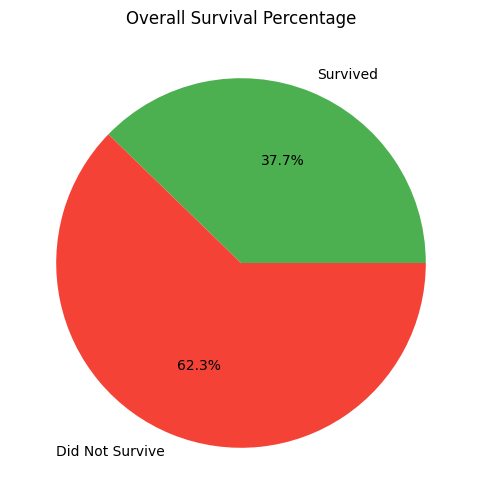

In [13]:
# Visualization 3: Pie Chart for Overall Survival
survival_labels = ['Survived', 'Did Not Survive']
survival_counts = [df[df['Survived'] == 1].shape[0], df[df['Survived'] == 0].shape[0]]
survival_percentage=round(df[df['Survived'] == 1].shape[0]/df.shape[0]*100,2)

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=survival_labels, autopct='%1.1f%%', colors=['#4caf50', '#f44336'])
plt.title('Overall Survival Percentage')
plt.show()

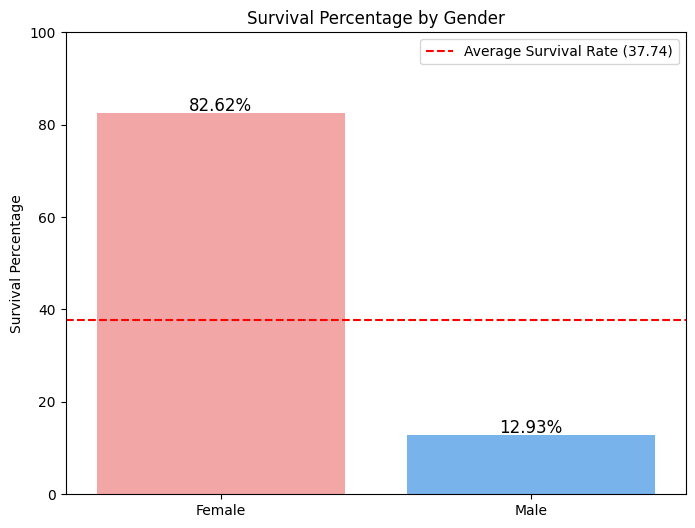

In [14]:
# Calculate variables for gender survival analysis
female_survivors = df[(df['Gender'] == 1) & (df['Survived'] == 1)].shape[0]
male_survivors = df[(df['Gender'] == 0) & (df['Survived'] == 1)].shape[0]

total_females = df[df['Gender'] == 1].shape[0]
total_males = df[df['Gender'] == 0].shape[0]

# Visualization 1: Survival by Gender
gender_labels = ['Female', 'Male']
gender_survival_rates = [
    (female_survivors / total_females) * 100 if total_females > 0 else 0,
    (male_survivors / total_males) * 100 if total_males > 0 else 0
]

# Plot the barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_labels, y=gender_survival_rates, palette=['#ff9999', '#66b3ff'])
plt.title('Survival Percentage by Gender')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)

# Add horizontal line at y=survival_percentage
plt.axhline(y=survival_percentage, color='r', linestyle='--', label=f'Average Survival Rate ({survival_percentage})')

# Show the legend
plt.legend()

# Add the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

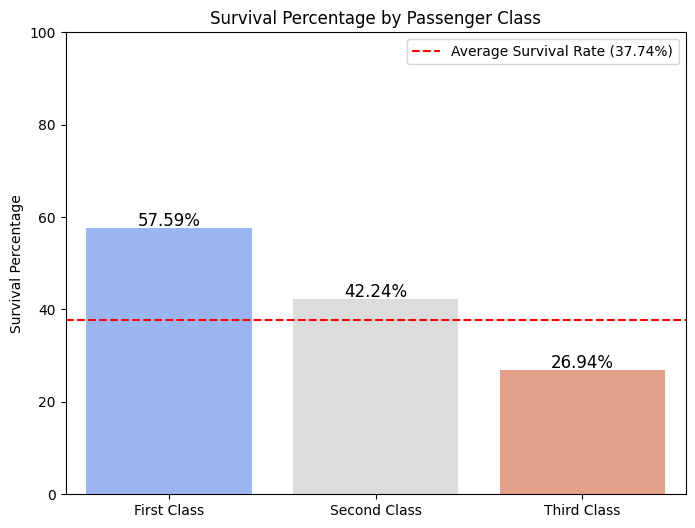

In [15]:
# Calculate variables for passenger class survival analysis
first_class_survivors = df[(df['Passenger_Class'] == 1) & (df['Survived'] == 1)].shape[0]
second_class_survivors = df[(df['Passenger_Class'] == 2) & (df['Survived'] == 1)].shape[0]
third_class_survivors = df[(df['Passenger_Class'] == 3) & (df['Survived'] == 1)].shape[0]

total_first_class = df[df['Passenger_Class'] == 1].shape[0]
total_second_class = df[df['Passenger_Class'] == 2].shape[0]
total_third_class = df[df['Passenger_Class'] == 3].shape[0]

# Visualization 2: Survival by Passenger Class
class_labels = ['First Class', 'Second Class', 'Third Class']
class_survival_rates = [
    (first_class_survivors / total_first_class) * 100 if total_first_class > 0 else 0,
    (second_class_survivors / total_second_class) * 100 if total_second_class > 0 else 0,
    (third_class_survivors / total_third_class) * 100 if total_third_class > 0 else 0
]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_survival_rates, palette='coolwarm')
plt.title('Survival Percentage by Passenger Class')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)

# Add horizontal line at y=survival_percentage
plt.axhline(y=survival_percentage, color='r', linestyle='--', label=f'Average Survival Rate ({survival_percentage}%)')

# Show the legend
plt.legend()

# Add the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
# Show the plot
plt.show()

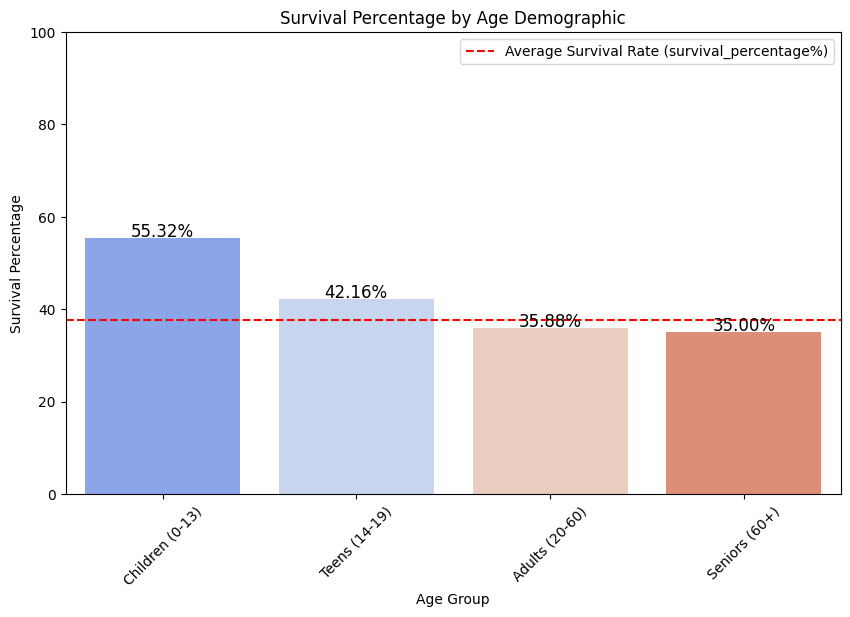

In [16]:
# Define age demographics
age_bins = [0, 13, 19, 60, 100]  # Children, Teens, Adults, Seniors
age_labels = ['Children (0-13)', 'Teens (14-19)', 'Adults (20-60)', 'Seniors (60+)']

# Add an age group column to the DataFrame
age_df = df.copy()
age_df['Age_Group'] = pd.cut(age_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival percentages by age group
age_group_survivors = age_df[age_df['Survived'] == 1].groupby('Age_Group').size()
age_group_totals = age_df.groupby('Age_Group').size()
age_group_survival_rates = (age_group_survivors / age_group_totals) * 100

# Visualization: Survival by Age Demographic
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_survival_rates.index, y=age_group_survival_rates, palette='coolwarm')
plt.title('Survival Percentage by Age Demographic')
plt.xlabel('Age Group')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Add horizontal line at y=survival_percentage
plt.axhline(y=survival_percentage, color='r', linestyle='--', label=f'Average Survival Rate (survival_percentage%)')

# Show the legend
plt.legend()

# Add the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
# Show the plot
plt.show()

In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## (III) K-Nearest Neighbors (KNN)

Running K-Nearest Neighbors (KNN)...


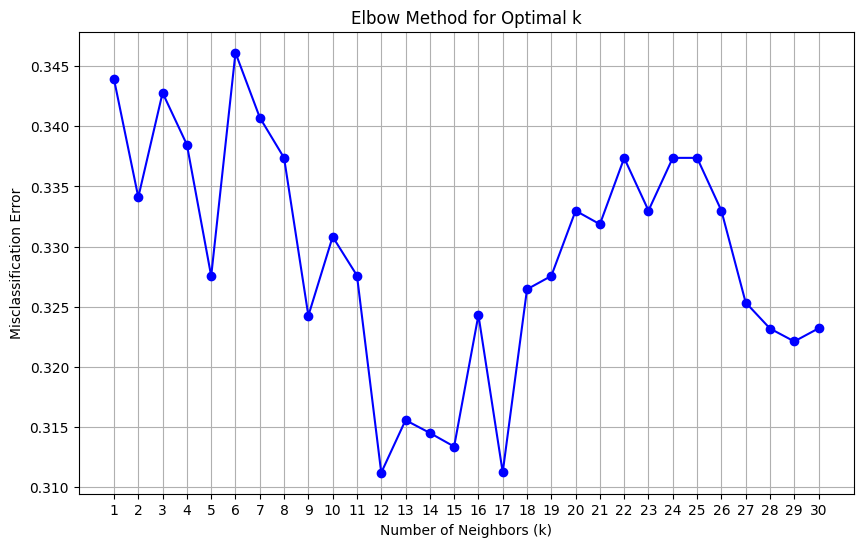

The optimal number of neighbors is k = 12


In [19]:
print("Running K-Nearest Neighbors (KNN)...")

# Step 4: Find the optimal k using the Elbow Method
k_values = range(1, 31)  # Testing k from 1 to 30
cv_scores = []  # Store cross-validation scores

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")  # 10-fold cross-validation
    cv_scores.append(scores.mean())

# Calculate the misclassification error for each k
error_rates = [1 - score for score in cv_scores]

# Step 5: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Misclassification Error")
plt.xticks(k_values)
plt.grid()
plt.show()

# Step 6: Select the best k (minimum error) and train the final model
optimal_k = k_values[np.argmin(error_rates)]
print(f"The optimal number of neighbors is k = {optimal_k}")

In [20]:
# Define the KNN model
k = optimal_k  # Number of neighbors (you can change this)
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# Calculate accuracies
training_accuracy = accuracy_score(y_train, train_predictions)
testing_accuracy = accuracy_score(y_test, test_predictions)

# Print results
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.7205
Testing Accuracy: 0.7405


In [21]:
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

[[221  23]
 [ 79  70]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       244
           1       0.75      0.47      0.58       149

    accuracy                           0.74       393
   macro avg       0.74      0.69      0.70       393
weighted avg       0.74      0.74      0.72       393



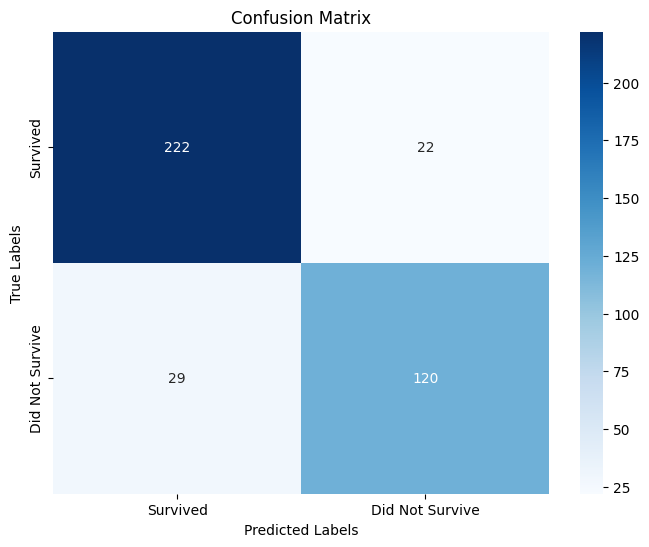

In [25]:
# Optional: Define class names
class_names = ['Survived', 'Did Not Survive']

# Plot using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## (IV) Naive Bayes

In [22]:
print("Running Naive Bayes...")
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

Running Naive Bayes...
Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       244
           1       0.78      0.81      0.79       149

    accuracy                           0.84       393
   macro avg       0.83      0.84      0.83       393
weighted avg       0.84      0.84      0.84       393



## (V) Support Vector Machine (SVM)

In [23]:
print("Running Support Vector Machine (SVM)...")
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC()
grid_search_svm = GridSearchCV(svm, svm_params, cv=5, scoring='f1_weighted')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

print("Best SVM Parameters:", grid_search_svm.best_params_)
y_pred_svm = best_svm.predict(X_test)

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

Running Support Vector Machine (SVM)...
Best SVM Parameters: {'C': 0.1, 'kernel': 'linear'}
SVM Performance:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       244
           1       0.83      0.79      0.81       149

    accuracy                           0.86       393
   macro avg       0.85      0.84      0.85       393
weighted avg       0.86      0.86      0.86       393



## (VI) Decision Tree

Training Accuracy: 0.87
Testing Accuracy: 0.87


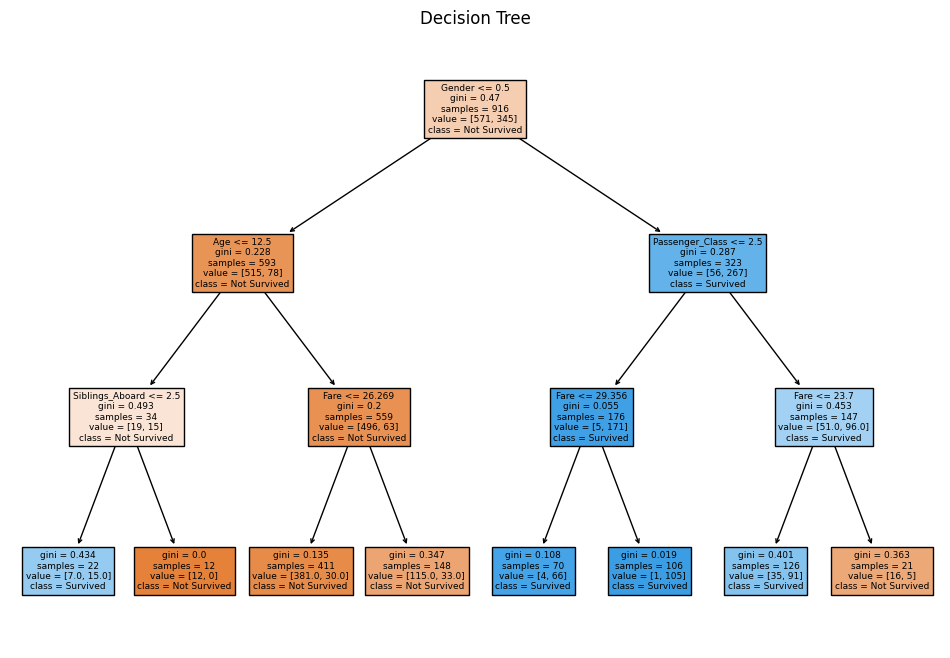

In [24]:
# Define the Decision Tree model
decision_tree = DecisionTreeClassifier(
    max_depth=3,                # Limit the depth of the tree
    min_samples_split=4,        # Minimum samples needed to split a node
    min_samples_leaf=2,         # Minimum samples in a leaf node
    max_leaf_nodes=10,          # Maximum number of leaf nodes
    random_state=42
)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Calculate accuracies
training_accuracy = accuracy_score(y_train, train_predictions)
testing_accuracy = accuracy_score(y_test, test_predictions)

# Print results
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns,class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree")
plt.show()